In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%matplotlib inline

In [3]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt


In [4]:
c_names = ['vID', 'frID', 'tFr','Timestamp', 'localX', 'localY', 'globalX','globalY', 'vLenght', 'vWidth', 'vType', 
           'veloc','accel', 'line', 'pred', 'foll', 'spac', 'headway']

data = pd.read_table('D:\\zzzLola\\PhD\\DataSet\\US101\\test\\1000ts.txt', sep='\t', header=None, names=c_names)


In [5]:
data[:10]

,vID,frID,tFr,Timestamp,localX,localY,globalX,globalY,vLenght,vWidth,vType,veloc,accel,line,pred,foll,spac,headway
0,1073,3211,587,1118847300000,20.097,1999.367,6452595.286,1872026.290,12.5,5,2,59.92,-1.71,2,0,1083,0,0
1,1073,3212,587,1118847300100,20.025,2005.368,6452600.004,1872022.536,12.5,5,2,59.60,-4.46,2,0,1083,0,0
2,1073,3213,587,1118847300200,19.973,2011.314,6452604.649,1872018.817,12.5,5,2,59.14,-5.47,2,0,1083,0,0
3,1073,3214,587,1118847300300,19.886,2017.183,6452609.253,1872015.175,12.5,5,2,58.78,-2.54,2,0,1083,0,0
4,1073,3215,587,1118847300400,19.817,2023.016,6452613.792,1872011.563,12.5,5,2,58.78,2.52,2,0,1083,0,0
5,1073,3216,587,1118847300500,19.731,2028.885,6452618.396,1872007.921,12.5,5,2,59.14,5.47,2,0,1083,0,0
6,1073,3217,587,1118847300600,19.678,2034.831,6452623.041,1872004.202,12.5,5,2,59.60,4.46,2,0,1083,0,0
7,1073,3218,587,1118847300700,19.606,2040.831,6452627.759,1872000.448,12.5,5,2,59.91,1.71,2,0,1083,0,0
8,1073,3219,587,1118847300800,19.535,2046.858,6452632.453,1871996.712,12.5,5,2,59.90,-2.03,2,0,1083,0,0
9,1073,3220,587,1118847300900,19.464,2052.849,6452637.148,1871992.976,12.5,5,2,59.60,-3.95,2,0,1083,0,0


In [6]:
data['vID'][:10]

0    1073
1    1073
2    1073
3    1073
4    1073
5    1073
6    1073
7    1073
8    1073
9    1073
Name: vID, dtype: int64

In [7]:
vID_counts = data['vID'].value_counts()
vID_counts[:10]

1280    600
1284    598
1309    593
1290    591
1325    586
1314    584
1337    581
1274    579
1348    577
1354    567
Name: vID, dtype: int64

In [8]:
plt.figure(figsize=(10, 4))

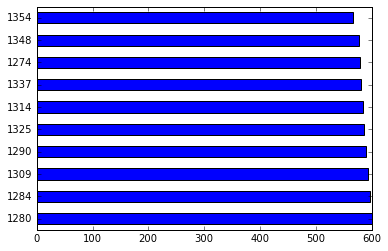

In [9]:
vID_counts[:10].plot(kind='barh', rot=0)

In [10]:
vID_count = DataFrame({'count' : data.groupby(['vID']).size()}).reset_index()
vID_mean = data.groupby('vID').mean()

In [11]:
vID_count[:10]

,vID,count
0,1073,22
1,1077,7
2,1080,28
3,1081,14
4,1082,31
5,1083,55
6,1084,46
7,1086,50
8,1087,12
9,1088,71


In [12]:
veloc_mean = DataFrame({'mean_vel' : vID_mean['veloc']}).reset_index()

In [13]:
veloc_mean[:10]

,vID,mean_vel
0,1073,59.675000
1,1077,65.571429
2,1080,59.145357
3,1081,59.093571
4,1082,64.702581
5,1083,57.425818
6,1084,57.018043
7,1086,64.074800
8,1087,60.841667
9,1088,57.004366


In [14]:
type(vID_count)

pandas.core.frame.DataFrame

In [15]:
type(veloc_mean)

pandas.core.frame.DataFrame

In [16]:
vehicles = pd.merge(vID_count,veloc_mean, on = 'vID')

In [17]:
vehicles[:10]

,vID,count,mean_vel
0,1073,22,59.675000
1,1077,7,65.571429
2,1080,28,59.145357
3,1081,14,59.093571
4,1082,31,64.702581
5,1083,55,57.425818
6,1084,46,57.018043
7,1086,50,64.074800
8,1087,12,60.841667
9,1088,71,57.004366


In [21]:
max(vehicles['count'])

600

In [25]:
vehicles.loc[vehicles['count'] == 600]

,vID,count,mean_vel
185,1280,600,35.009233


In [27]:
v1280 = data.loc[data['vID'] == 1280]

In [33]:
v1280group = v1280.groupby('pred').count()

In [34]:
v1280group

,vID,frID,tFr,Timestamp,localX,localY,globalX,globalY,vLenght,vWidth,vType,veloc,accel,line,foll,spac,headway
pred,,,,,,,,,,,,,,,,,
0,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
1274,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555


In [17]:
np.savetxt('D:\\zzzLola\\PhD\\DataSet\\US101\\test\\vehi_small.txt',vehicles, fmt='%.10e', delimiter='\t', newline='\n')